# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [43]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
data_results = pd.merge(mouse_metadata, study_results, on="Mouse ID")


# Display the data table for preview
data_results

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [38]:
# Checking the number of mice.
total_mice = data_results["Mouse ID"].nunique()
total_mice

249

In [39]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = data_results[data_results.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]
duplicate_mice


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [40]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = data_results[data_results["Mouse ID"] != "g989"]
clean_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [41]:
# Checking the number of mice in the clean DataFrame.
clean_total_mice = clean_data["Mouse ID"].nunique()
clean_total_mice

248

## Summary Statistics

In [86]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_stats = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
summary_stats = summary_stats.rename(columns={
    'mean': 'Mean Tumor Volume',
    'median': 'Median Tumor Volume',
    'var': 'Tumor Volume Variance',
    'std': 'Tumor Volume Std. Dev.',
    'sem': 'Tumor Volume Std. Err.'
})
# Assemble the resulting series into a single summary DataFrame.
summary_df = pd.DataFrame(summary_stats)
summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [85]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_stats

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

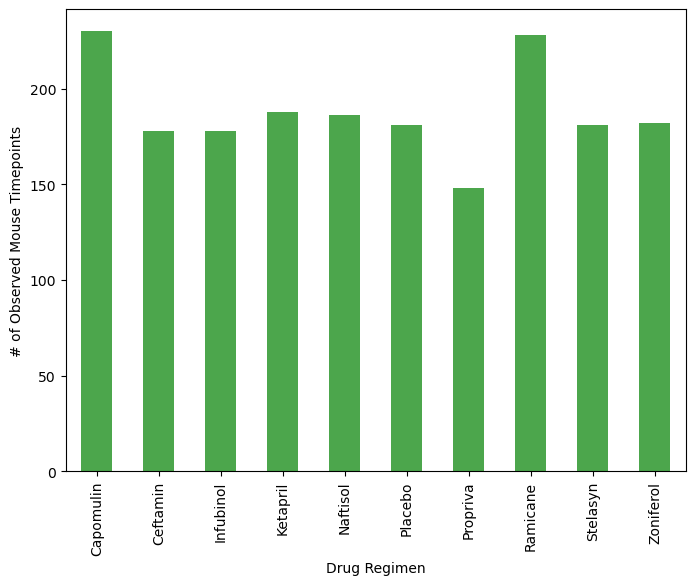

In [102]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
total_rows = clean_data.groupby('Drug Regimen').size()
ax = total_rows.plot(kind='bar', color='green', alpha=0.7, figsize=(8, 6))
ax.set_xlabel('Drug Regimen', fontsize=10)
ax.set_ylabel('# of Observed Mouse Timepoints', fontsize=10)
plt.show()

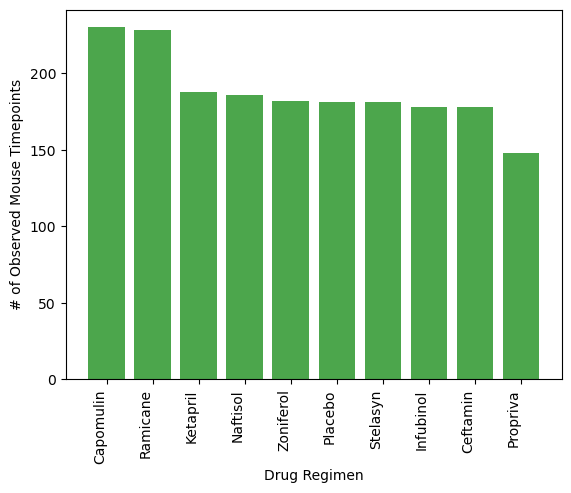

In [101]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
total_rows = clean_data['Drug Regimen'].value_counts()
plt.bar(total_rows.index, total_rows, color='green', alpha=0.7)
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation=90, ha='right')
plt.show()

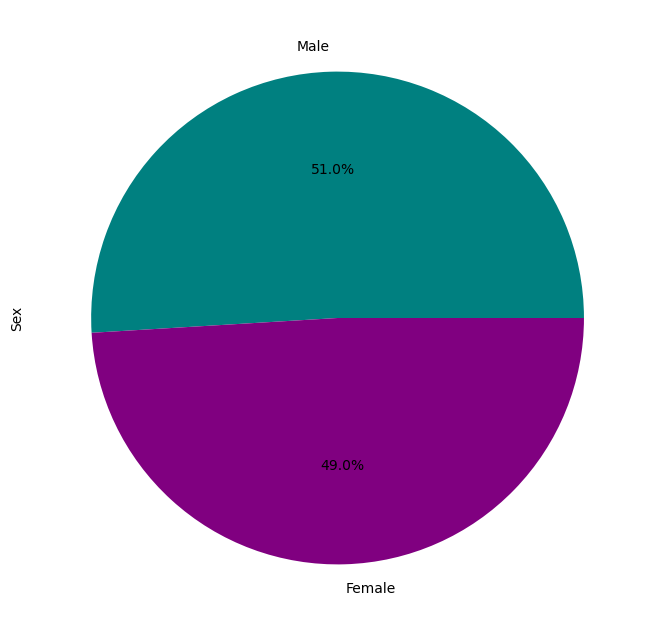

In [104]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_distribution = clean_data['Sex'].value_counts()
ax = gender_distribution.plot.pie(autopct='%1.1f%%', startangle=0, figsize=(8, 8), colors=['teal', 'purple'])
ax.set_ylabel('Sex')
plt.show()

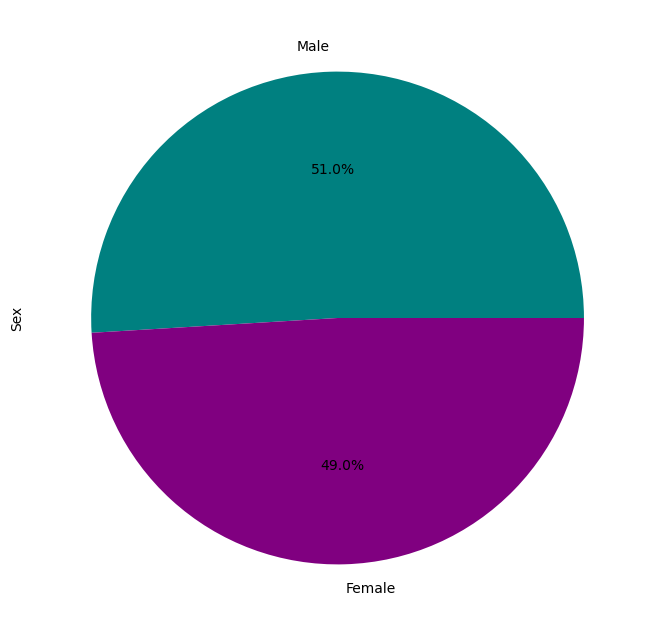

In [105]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_distribution = clean_data['Sex'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(gender_distribution, labels=gender_distribution.index, autopct='%1.1f%%', startangle=0, colors=['teal', 'purple'])
plt.ylabel('Sex', fontsize=10)
plt.show()

## Quartiles, Outliers and Boxplots

In [139]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
drug_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
treatment_data = clean_data[clean_data['Drug Regimen'].isin(drug_regimens)]
# Start by getting the last (greatest) timepoint for each mouse
last_timepoints = treatment_data.groupby('Mouse ID')['Timepoint'].max()
final_timepoints = pd.DataFrame(last_timepoints).reset_index()
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume = pd.merge(final_timepoints, treatment_data, on=['Mouse ID', 'Timepoint'], how='left')
final_tumor_volume

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a275,45,Ceftamin,Female,20,28,62.999356,3
3,a411,45,Ramicane,Male,3,22,38.407618,1
4,a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
95,y769,45,Ceftamin,Female,6,27,68.594745,4
96,y793,45,Capomulin,Male,17,17,31.896238,2
97,y865,45,Ceftamin,Male,23,26,64.729837,3
98,z578,45,Ramicane,Male,11,16,30.638696,0


In [150]:
# Put treatments into a list for for loop (and later for plot labels)
drug_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers
for drug in drug_regimens:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    drug_tum_vol = final_tumor_volume.loc[final_tumor_volume['Drug Regimen'] == drug, 'Tumor Volume (mm3)']
    
    # add subset
    tumor_volume_data.append(drug_tum_vol)
    quartiles = drug_tum_vol.quantile([0.25, 0.5, 0.75])
    lower_q = quartiles[0.25]
    upper_q = quartiles[0.75]
    iqr = upper_q - lower_q
    
    # Determine outliers using upper and lower bounds
    lower_bound = lower_q - 1.5 * iqr
    upper_bound = upper_q + 1.5 * iqr
    outliers = drug_tum_vol[(drug_tum_vol < lower_bound) | (drug_tum_vol > upper_bound)]
    
    # Print results
    print(f"{drug}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


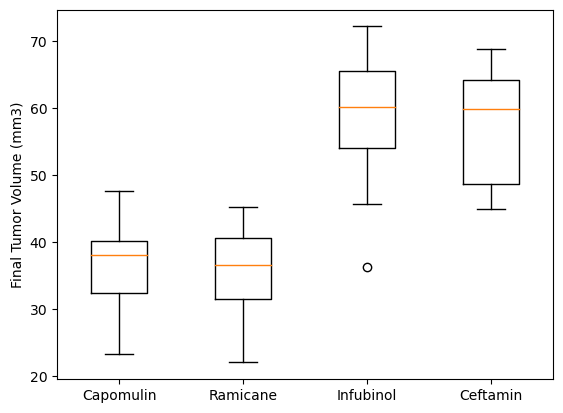

In [157]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(tumor_volume_data, labels=drug_regimens)
plt.show()

## Line and Scatter Plots

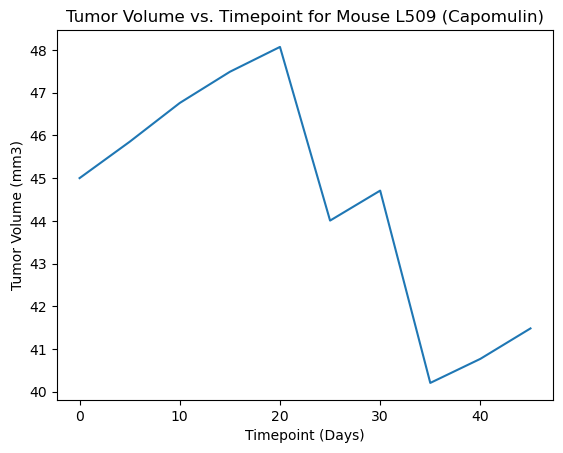

In [191]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_l509_data = clean_data[(clean_data['Mouse ID'] == 'l509') & (clean_data['Drug Regimen'] == 'Capomulin')]
plt.plot(mouse_l509_data['Timepoint'], mouse_l509_data['Tumor Volume (mm3)'])
plt.title('Capomulin Treatment of Mouse L509)')
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

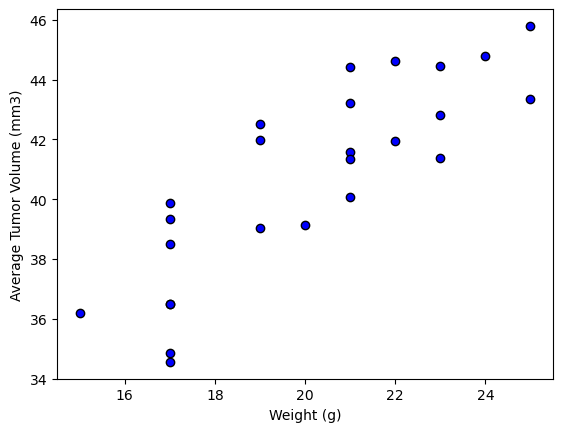

In [192]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = clean_data[clean_data['Drug Regimen'] == 'Capomulin']
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
mouse_weights = capomulin_data.groupby('Mouse ID')['Weight (g)'].mean()
plt.scatter(mouse_weights, average_tumor_volume, marker='o', facecolors='blue', edgecolors='black')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

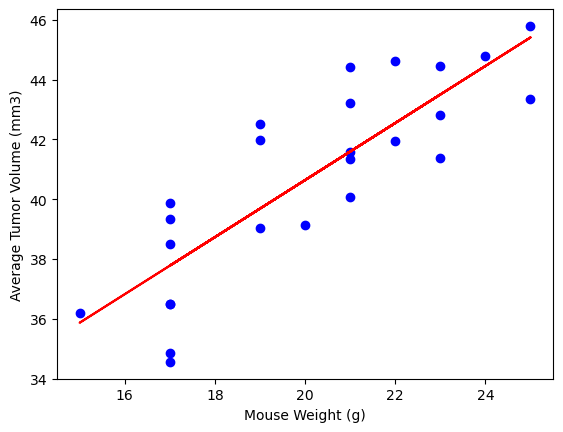

In [199]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
capomulin_data = clean_data[clean_data['Drug Regimen'] == 'Capomulin']
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
mouse_weights = capomulin_data.groupby('Mouse ID')['Weight (g)'].mean()
correlation_coefficient = round(st.pearsonr(mouse_weights, average_tumor_volume)[0], 2)
(slope, intercept, rvalue, pvalue, stderr) = linregress(mouse_weights, average_tumor_volume)
regress_values = mouse_weights * slope + intercept
plt.scatter(mouse_weights, average_tumor_volume, marker='o', facecolors='blue')
plt.plot(mouse_weights, regress_values, 'r-')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()